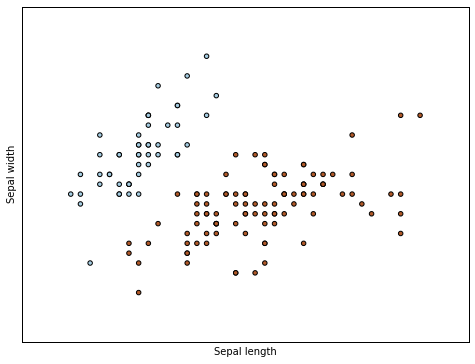

In [87]:
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.cross_validation import train_test_split

def sigmoid(X, W):
    return (1 / (1 + np.exp(-np.dot(X, W))))

def penalties(X, W, Y):
    return (np.sum((sigmoid(X, W) - Y)**2))

# import some data to play with
iris = datasets.load_iris()
X = np.vstack((np.ones(len(iris.data)),iris.data[:, :2].T)).T  # we only take the first two features
Y = (iris.target >= 1).astype(int)
Y = Y.reshape(np.size(Y), 1)

x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X[:, 1], X[:, 2], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [88]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [89]:
W = np.zeros(3).reshape(3, 1)
alpha = 0.002
for i in range(5000):
    W = W - alpha * 2 * np.sum((np.exp(-np.dot(X_train, W))/(1 + np.exp(-np.dot(X_train, W))) ** 2 * X_train) * (1 / (1 + np.exp(-np.dot(X_train, W))) - Y_train), axis = 0).reshape(3, 1)

In [90]:
penalties(X, W, Y)

1.5867120619378494

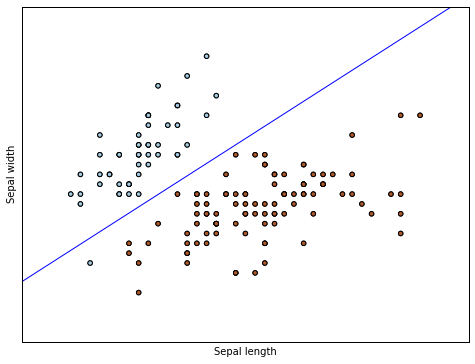

In [91]:
x_min, x_max = X[:, 1].min() - .5, X[:, 1].max() + .5
y_min, y_max = X[:, 2].min() - .5, X[:, 2].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()
# Plot the training points
plt.scatter(X[:, 1], X[:, 2], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.plot(np.linspace(0,10,100), -W[0]/W[2] -W[1]/W[2]*np.linspace(0,10,100))
plt.scatter(X[:, 1], X[:, 2], c=Y, cmap=plt.cm.Paired)

plt.show()

In [92]:
preds = []
for i in range(len(X_test)):
    preds.append(np.sign(np.dot(np.concatenate(W), X_test[i])))

In [93]:
from sklearn.metrics import accuracy_score

In [94]:
accuracy_score(Y_test,(np.array(preds)+1)/2)

1.0